In [1]:
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data_original/wind_farms/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)

In [2]:
Dataset_WF_site1.shape

(70175, 13)

In [3]:
for dataset in [Dataset_WF_site1]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']

In [4]:
Dataset_WF_site1.head()

,time,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
1,2019-01-01 00:15:00,1.828,77.460,1.698,75.048,1.757,88.733,1.882,74.367,-13.691,889.575,76.757,0.329703
2,2019-01-01 00:30:00,2.193,86.700,2.313,84.688,2.344,89.100,2.350,NaN,-13.766,889.942,76.981,0.296306
3,2019-01-01 00:45:00,2.654,78.160,2.494,74.939,2.574,87.267,2.808,82.733,-13.691,889.675,76.821,0.187590
4,2019-01-01 01:00:00,2.249,94.297,2.192,91.140,2.558,96.900,2.924,92.967,-13.447,890.025,74.571,0.081005
5,2019-01-01 01:15:00,1.974,92.933,1.980,91.921,2.049,97.000,2.137,100.133,-13.983,889.692,71.808,0.189721


In [5]:
X = Dataset_WF_site1.drop(['Power(MW)','time','Air_P','Air_H'],axis='columns')
y = Dataset_WF_site1['Power(MW)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [6]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [7]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
model = xgb.XGBRegressor(n_estimators=2000, eta=0.05)
# define model evaluation method
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train,y_train, eval_metric='logloss', eval_set=evalset)



[0]	validation_0-logloss:-790.65887	validation_1-logloss:-794.83850
[1]	validation_0-logloss:-816.35040	validation_1-logloss:-820.09326
[2]	validation_0-logloss:-822.85400	validation_1-logloss:-826.06690
[3]	validation_0-logloss:-824.36780	validation_1-logloss:-827.81317
[4]	validation_0-logloss:-825.76221	validation_1-logloss:-829.21332
[5]	validation_0-logloss:-826.16009	validation_1-logloss:-829.76898
[6]	validation_0-logloss:-826.44946	validation_1-logloss:-830.28784
[7]	validation_0-logloss:-826.58630	validation_1-logloss:-830.49994
[8]	validation_0-logloss:-826.61377	validation_1-logloss:-830.53565
[9]	validation_0-logloss:-826.95538	validation_1-logloss:-831.00732
[10]	validation_0-logloss:-827.31506	validation_1-logloss:-831.21741
[11]	validation_0-logloss:-827.39410	validation_1-logloss:-831.27283
[12]	validation_0-logloss:-827.44836	validation_1-logloss:-831.36316
[13]	validation_0-logloss:-827.43378	validation_1-logloss:-831.45111
[14]	validation_0-logloss:-827.43512	validat

[119]	validation_0-logloss:-828.05353	validation_1-logloss:-832.29889
[120]	validation_0-logloss:-828.05450	validation_1-logloss:-832.30792
[121]	validation_0-logloss:-828.05243	validation_1-logloss:-832.30395
[122]	validation_0-logloss:-828.04816	validation_1-logloss:-832.30145
[123]	validation_0-logloss:-828.05072	validation_1-logloss:-832.30017
[124]	validation_0-logloss:-828.04816	validation_1-logloss:-832.29559
[125]	validation_0-logloss:-828.04590	validation_1-logloss:-832.29547
[126]	validation_0-logloss:-828.03998	validation_1-logloss:-832.29755
[127]	validation_0-logloss:-828.04828	validation_1-logloss:-832.29517
[128]	validation_0-logloss:-828.05444	validation_1-logloss:-832.29639
[129]	validation_0-logloss:-828.05609	validation_1-logloss:-832.29462
[130]	validation_0-logloss:-828.05664	validation_1-logloss:-832.29273
[131]	validation_0-logloss:-828.04987	validation_1-logloss:-832.29156
[132]	validation_0-logloss:-828.04932	validation_1-logloss:-832.28980
[133]	validation_0-l

[236]	validation_0-logloss:-828.02588	validation_1-logloss:-832.18463
[237]	validation_0-logloss:-828.02655	validation_1-logloss:-832.17828
[238]	validation_0-logloss:-828.02710	validation_1-logloss:-832.18341
[239]	validation_0-logloss:-828.02716	validation_1-logloss:-832.18304
[240]	validation_0-logloss:-828.02716	validation_1-logloss:-832.18347
[241]	validation_0-logloss:-828.02783	validation_1-logloss:-832.17523
[242]	validation_0-logloss:-828.02771	validation_1-logloss:-832.17529
[243]	validation_0-logloss:-828.02771	validation_1-logloss:-832.17529
[244]	validation_0-logloss:-828.02679	validation_1-logloss:-832.15845
[245]	validation_0-logloss:-828.02679	validation_1-logloss:-832.15845
[246]	validation_0-logloss:-828.02393	validation_1-logloss:-832.15613
[247]	validation_0-logloss:-828.01868	validation_1-logloss:-832.15576
[248]	validation_0-logloss:-828.02142	validation_1-logloss:-832.15491
[249]	validation_0-logloss:-828.02142	validation_1-logloss:-832.15485
[250]	validation_0-l

[354]	validation_0-logloss:-828.02270	validation_1-logloss:-832.10687
[355]	validation_0-logloss:-828.01569	validation_1-logloss:-832.10883
[356]	validation_0-logloss:-828.01550	validation_1-logloss:-832.10889
[357]	validation_0-logloss:-828.01666	validation_1-logloss:-832.10895
[358]	validation_0-logloss:-828.01666	validation_1-logloss:-832.10895
[359]	validation_0-logloss:-828.01526	validation_1-logloss:-832.10883
[360]	validation_0-logloss:-828.01550	validation_1-logloss:-832.10889
[361]	validation_0-logloss:-828.01550	validation_1-logloss:-832.10889
[362]	validation_0-logloss:-828.01440	validation_1-logloss:-832.10883
[363]	validation_0-logloss:-828.01422	validation_1-logloss:-832.10864
[364]	validation_0-logloss:-828.00946	validation_1-logloss:-832.10437
[365]	validation_0-logloss:-828.00940	validation_1-logloss:-832.10431
[366]	validation_0-logloss:-828.00940	validation_1-logloss:-832.10431
[367]	validation_0-logloss:-828.00946	validation_1-logloss:-832.10388
[368]	validation_0-l

[472]	validation_0-logloss:-827.99872	validation_1-logloss:-832.06720
[473]	validation_0-logloss:-827.99658	validation_1-logloss:-832.06891
[474]	validation_0-logloss:-828.00623	validation_1-logloss:-832.08813
[475]	validation_0-logloss:-828.00519	validation_1-logloss:-832.08466
[476]	validation_0-logloss:-828.00384	validation_1-logloss:-832.07153
[477]	validation_0-logloss:-828.00250	validation_1-logloss:-832.06976
[478]	validation_0-logloss:-828.00256	validation_1-logloss:-832.06982
[479]	validation_0-logloss:-828.00256	validation_1-logloss:-832.06982
[480]	validation_0-logloss:-828.00244	validation_1-logloss:-832.06757
[481]	validation_0-logloss:-828.00354	validation_1-logloss:-832.07013
[482]	validation_0-logloss:-828.00324	validation_1-logloss:-832.08923
[483]	validation_0-logloss:-828.00281	validation_1-logloss:-832.08923
[484]	validation_0-logloss:-828.00177	validation_1-logloss:-832.08685
[485]	validation_0-logloss:-828.00226	validation_1-logloss:-832.08423
[486]	validation_0-l

[590]	validation_0-logloss:-828.00500	validation_1-logloss:-831.96246
[591]	validation_0-logloss:-828.00500	validation_1-logloss:-831.96246
[592]	validation_0-logloss:-828.00500	validation_1-logloss:-831.96246
[593]	validation_0-logloss:-828.00720	validation_1-logloss:-831.96167
[594]	validation_0-logloss:-828.00690	validation_1-logloss:-831.96167
[595]	validation_0-logloss:-828.00696	validation_1-logloss:-831.96240
[596]	validation_0-logloss:-828.00543	validation_1-logloss:-831.97137
[597]	validation_0-logloss:-828.00330	validation_1-logloss:-831.97522
[598]	validation_0-logloss:-828.00244	validation_1-logloss:-831.97522
[599]	validation_0-logloss:-828.00311	validation_1-logloss:-831.97522
[600]	validation_0-logloss:-828.00201	validation_1-logloss:-831.97534
[601]	validation_0-logloss:-828.00610	validation_1-logloss:-831.96350
[602]	validation_0-logloss:-828.00763	validation_1-logloss:-831.96356
[603]	validation_0-logloss:-828.00855	validation_1-logloss:-831.96503
[604]	validation_0-l

[708]	validation_0-logloss:-828.02496	validation_1-logloss:-831.80450
[709]	validation_0-logloss:-828.02637	validation_1-logloss:-831.81055
[710]	validation_0-logloss:-828.02484	validation_1-logloss:-831.81116
[711]	validation_0-logloss:-828.02423	validation_1-logloss:-831.81128
[712]	validation_0-logloss:-828.02387	validation_1-logloss:-831.81140
[713]	validation_0-logloss:-828.02466	validation_1-logloss:-831.81128
[714]	validation_0-logloss:-828.02380	validation_1-logloss:-831.81073
[715]	validation_0-logloss:-828.01965	validation_1-logloss:-831.80035
[716]	validation_0-logloss:-828.02008	validation_1-logloss:-831.79852
[717]	validation_0-logloss:-828.01855	validation_1-logloss:-831.79553
[718]	validation_0-logloss:-828.01819	validation_1-logloss:-831.79443
[719]	validation_0-logloss:-828.01904	validation_1-logloss:-831.79413
[720]	validation_0-logloss:-828.01904	validation_1-logloss:-831.79529
[721]	validation_0-logloss:-828.01904	validation_1-logloss:-831.79407
[722]	validation_0-l

[826]	validation_0-logloss:-828.03742	validation_1-logloss:-831.77411
[827]	validation_0-logloss:-828.03705	validation_1-logloss:-831.77411
[828]	validation_0-logloss:-828.03632	validation_1-logloss:-831.77405
[829]	validation_0-logloss:-828.03662	validation_1-logloss:-831.77405
[830]	validation_0-logloss:-828.03625	validation_1-logloss:-831.77466
[831]	validation_0-logloss:-828.03577	validation_1-logloss:-831.77423
[832]	validation_0-logloss:-828.03613	validation_1-logloss:-831.77429
[833]	validation_0-logloss:-828.03613	validation_1-logloss:-831.77441
[834]	validation_0-logloss:-828.03577	validation_1-logloss:-831.77429
[835]	validation_0-logloss:-828.03571	validation_1-logloss:-831.77441
[836]	validation_0-logloss:-828.03565	validation_1-logloss:-831.77435
[837]	validation_0-logloss:-828.03565	validation_1-logloss:-831.77435
[838]	validation_0-logloss:-828.03497	validation_1-logloss:-831.77411
[839]	validation_0-logloss:-828.03882	validation_1-logloss:-831.77643
[840]	validation_0-l

[944]	validation_0-logloss:-828.03699	validation_1-logloss:-831.70642
[945]	validation_0-logloss:-828.03699	validation_1-logloss:-831.70709
[946]	validation_0-logloss:-828.03705	validation_1-logloss:-831.70709
[947]	validation_0-logloss:-828.03772	validation_1-logloss:-831.70508
[948]	validation_0-logloss:-828.03656	validation_1-logloss:-831.70361
[949]	validation_0-logloss:-828.03430	validation_1-logloss:-831.70245
[950]	validation_0-logloss:-828.03186	validation_1-logloss:-831.70703
[951]	validation_0-logloss:-828.03094	validation_1-logloss:-831.70697
[952]	validation_0-logloss:-828.03058	validation_1-logloss:-831.70538
[953]	validation_0-logloss:-828.03107	validation_1-logloss:-831.70532
[954]	validation_0-logloss:-828.02924	validation_1-logloss:-831.70489
[955]	validation_0-logloss:-828.02924	validation_1-logloss:-831.70489
[956]	validation_0-logloss:-828.02911	validation_1-logloss:-831.70489
[957]	validation_0-logloss:-828.02893	validation_1-logloss:-831.70697
[958]	validation_0-l

[1061]	validation_0-logloss:-828.06769	validation_1-logloss:-831.71149
[1062]	validation_0-logloss:-828.06812	validation_1-logloss:-831.71307
[1063]	validation_0-logloss:-828.06775	validation_1-logloss:-831.71155
[1064]	validation_0-logloss:-828.06732	validation_1-logloss:-831.71149
[1065]	validation_0-logloss:-828.06696	validation_1-logloss:-831.71289
[1066]	validation_0-logloss:-828.06702	validation_1-logloss:-831.71149
[1067]	validation_0-logloss:-828.06714	validation_1-logloss:-831.71149
[1068]	validation_0-logloss:-828.06775	validation_1-logloss:-831.71252
[1069]	validation_0-logloss:-828.06805	validation_1-logloss:-831.71252
[1070]	validation_0-logloss:-828.06738	validation_1-logloss:-831.71643
[1071]	validation_0-logloss:-828.06696	validation_1-logloss:-831.71631
[1072]	validation_0-logloss:-828.06690	validation_1-logloss:-831.71631
[1073]	validation_0-logloss:-828.06702	validation_1-logloss:-831.71631
[1074]	validation_0-logloss:-828.06903	validation_1-logloss:-831.71802
[1075]

[1177]	validation_0-logloss:-828.06360	validation_1-logloss:-831.73505
[1178]	validation_0-logloss:-828.06348	validation_1-logloss:-831.73505
[1179]	validation_0-logloss:-828.06378	validation_1-logloss:-831.73505
[1180]	validation_0-logloss:-828.06360	validation_1-logloss:-831.73505
[1181]	validation_0-logloss:-828.06274	validation_1-logloss:-831.73651
[1182]	validation_0-logloss:-828.06140	validation_1-logloss:-831.73865
[1183]	validation_0-logloss:-828.06274	validation_1-logloss:-831.74078
[1184]	validation_0-logloss:-828.06256	validation_1-logloss:-831.74066
[1185]	validation_0-logloss:-828.06244	validation_1-logloss:-831.74072
[1186]	validation_0-logloss:-828.06183	validation_1-logloss:-831.74066
[1187]	validation_0-logloss:-828.06335	validation_1-logloss:-831.74213
[1188]	validation_0-logloss:-828.06372	validation_1-logloss:-831.74213
[1189]	validation_0-logloss:-828.06720	validation_1-logloss:-831.75000
[1190]	validation_0-logloss:-828.06683	validation_1-logloss:-831.75140
[1191]

[1293]	validation_0-logloss:-828.09094	validation_1-logloss:-831.85175
[1294]	validation_0-logloss:-828.09076	validation_1-logloss:-831.85266
[1295]	validation_0-logloss:-828.09076	validation_1-logloss:-831.85266
[1296]	validation_0-logloss:-828.09204	validation_1-logloss:-831.85327
[1297]	validation_0-logloss:-828.09222	validation_1-logloss:-831.85327
[1298]	validation_0-logloss:-828.09210	validation_1-logloss:-831.85284
[1299]	validation_0-logloss:-828.09119	validation_1-logloss:-831.85303
[1300]	validation_0-logloss:-828.08954	validation_1-logloss:-831.85144
[1301]	validation_0-logloss:-828.08935	validation_1-logloss:-831.85236
[1302]	validation_0-logloss:-828.08935	validation_1-logloss:-831.85126
[1303]	validation_0-logloss:-828.08935	validation_1-logloss:-831.85126
[1304]	validation_0-logloss:-828.09106	validation_1-logloss:-831.85327
[1305]	validation_0-logloss:-828.09106	validation_1-logloss:-831.85327
[1306]	validation_0-logloss:-828.09100	validation_1-logloss:-831.85040
[1307]

[1408]	validation_0-logloss:-828.10797	validation_1-logloss:-831.71246
[1409]	validation_0-logloss:-828.10828	validation_1-logloss:-831.71252
[1410]	validation_0-logloss:-828.10828	validation_1-logloss:-831.71252
[1411]	validation_0-logloss:-828.10809	validation_1-logloss:-831.71295
[1412]	validation_0-logloss:-828.10821	validation_1-logloss:-831.71143
[1413]	validation_0-logloss:-828.10736	validation_1-logloss:-831.71344
[1414]	validation_0-logloss:-828.10724	validation_1-logloss:-831.71350
[1415]	validation_0-logloss:-828.10529	validation_1-logloss:-831.70868
[1416]	validation_0-logloss:-828.10284	validation_1-logloss:-831.71204
[1417]	validation_0-logloss:-828.10254	validation_1-logloss:-831.71204
[1418]	validation_0-logloss:-828.10864	validation_1-logloss:-831.71289
[1419]	validation_0-logloss:-828.10864	validation_1-logloss:-831.71277
[1420]	validation_0-logloss:-828.10803	validation_1-logloss:-831.71265
[1421]	validation_0-logloss:-828.11145	validation_1-logloss:-831.71960
[1422]

[1524]	validation_0-logloss:-828.13525	validation_1-logloss:-831.70636
[1525]	validation_0-logloss:-828.13452	validation_1-logloss:-831.70642
[1526]	validation_0-logloss:-828.13483	validation_1-logloss:-831.70709
[1527]	validation_0-logloss:-828.13495	validation_1-logloss:-831.70703
[1528]	validation_0-logloss:-828.13605	validation_1-logloss:-831.70496
[1529]	validation_0-logloss:-828.13513	validation_1-logloss:-831.70831
[1530]	validation_0-logloss:-828.13525	validation_1-logloss:-831.70874
[1531]	validation_0-logloss:-828.13483	validation_1-logloss:-831.70856
[1532]	validation_0-logloss:-828.13471	validation_1-logloss:-831.70856
[1533]	validation_0-logloss:-828.13471	validation_1-logloss:-831.70868
[1534]	validation_0-logloss:-828.13471	validation_1-logloss:-831.70300
[1535]	validation_0-logloss:-828.13513	validation_1-logloss:-831.70294
[1536]	validation_0-logloss:-828.13471	validation_1-logloss:-831.70294
[1537]	validation_0-logloss:-828.13452	validation_1-logloss:-831.70325
[1538]

[1640]	validation_0-logloss:-828.17291	validation_1-logloss:-831.69745
[1641]	validation_0-logloss:-828.17206	validation_1-logloss:-831.69598
[1642]	validation_0-logloss:-828.17114	validation_1-logloss:-831.69611
[1643]	validation_0-logloss:-828.17114	validation_1-logloss:-831.69617
[1644]	validation_0-logloss:-828.17151	validation_1-logloss:-831.70160
[1645]	validation_0-logloss:-828.17291	validation_1-logloss:-831.70068
[1646]	validation_0-logloss:-828.17291	validation_1-logloss:-831.70068
[1647]	validation_0-logloss:-828.17249	validation_1-logloss:-831.70074
[1648]	validation_0-logloss:-828.17242	validation_1-logloss:-831.69238
[1649]	validation_0-logloss:-828.17242	validation_1-logloss:-831.69232
[1650]	validation_0-logloss:-828.17285	validation_1-logloss:-831.69025
[1651]	validation_0-logloss:-828.17273	validation_1-logloss:-831.69025
[1652]	validation_0-logloss:-828.17194	validation_1-logloss:-831.69037
[1653]	validation_0-logloss:-828.17230	validation_1-logloss:-831.69025
[1654]

[1756]	validation_0-logloss:-828.18317	validation_1-logloss:-831.64887
[1757]	validation_0-logloss:-828.18310	validation_1-logloss:-831.64880
[1758]	validation_0-logloss:-828.18310	validation_1-logloss:-831.64905
[1759]	validation_0-logloss:-828.18250	validation_1-logloss:-831.64667
[1760]	validation_0-logloss:-828.18237	validation_1-logloss:-831.64679
[1761]	validation_0-logloss:-828.18237	validation_1-logloss:-831.64673
[1762]	validation_0-logloss:-828.17957	validation_1-logloss:-831.64868
[1763]	validation_0-logloss:-828.17957	validation_1-logloss:-831.64874
[1764]	validation_0-logloss:-828.17822	validation_1-logloss:-831.64893
[1765]	validation_0-logloss:-828.17865	validation_1-logloss:-831.64887
[1766]	validation_0-logloss:-828.17865	validation_1-logloss:-831.64887
[1767]	validation_0-logloss:-828.17865	validation_1-logloss:-831.64887
[1768]	validation_0-logloss:-828.17822	validation_1-logloss:-831.64740
[1769]	validation_0-logloss:-828.17822	validation_1-logloss:-831.64746
[1770]

[1872]	validation_0-logloss:-828.19165	validation_1-logloss:-831.67438
[1873]	validation_0-logloss:-828.19122	validation_1-logloss:-831.67438
[1874]	validation_0-logloss:-828.19086	validation_1-logloss:-831.67352
[1875]	validation_0-logloss:-828.19098	validation_1-logloss:-831.67505
[1876]	validation_0-logloss:-828.19043	validation_1-logloss:-831.67609
[1877]	validation_0-logloss:-828.18817	validation_1-logloss:-831.66956
[1878]	validation_0-logloss:-828.18811	validation_1-logloss:-831.67102
[1879]	validation_0-logloss:-828.18848	validation_1-logloss:-831.66962
[1880]	validation_0-logloss:-828.18848	validation_1-logloss:-831.66968
[1881]	validation_0-logloss:-828.18805	validation_1-logloss:-831.66962
[1882]	validation_0-logloss:-828.18811	validation_1-logloss:-831.67480
[1883]	validation_0-logloss:-828.18799	validation_1-logloss:-831.68060
[1884]	validation_0-logloss:-828.18799	validation_1-logloss:-831.68054
[1885]	validation_0-logloss:-828.18732	validation_1-logloss:-831.68079
[1886]

[1988]	validation_0-logloss:-828.21283	validation_1-logloss:-831.79810
[1989]	validation_0-logloss:-828.21295	validation_1-logloss:-831.79675
[1990]	validation_0-logloss:-828.21295	validation_1-logloss:-831.79675
[1991]	validation_0-logloss:-828.21320	validation_1-logloss:-831.79688
[1992]	validation_0-logloss:-828.21399	validation_1-logloss:-831.79822
[1993]	validation_0-logloss:-828.21387	validation_1-logloss:-831.79822
[1994]	validation_0-logloss:-828.21100	validation_1-logloss:-831.79456
[1995]	validation_0-logloss:-828.21185	validation_1-logloss:-831.79456
[1996]	validation_0-logloss:-828.21448	validation_1-logloss:-831.79156
[1997]	validation_0-logloss:-828.21454	validation_1-logloss:-831.79156
[1998]	validation_0-logloss:-828.21460	validation_1-logloss:-831.79242
[1999]	validation_0-logloss:-828.21118	validation_1-logloss:-831.79065


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.05, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [8]:
y_predict= model.predict(X_test)

In [9]:
import numpy as np
expectations = np.array(y_test)
predictions = np.array(y_predict)

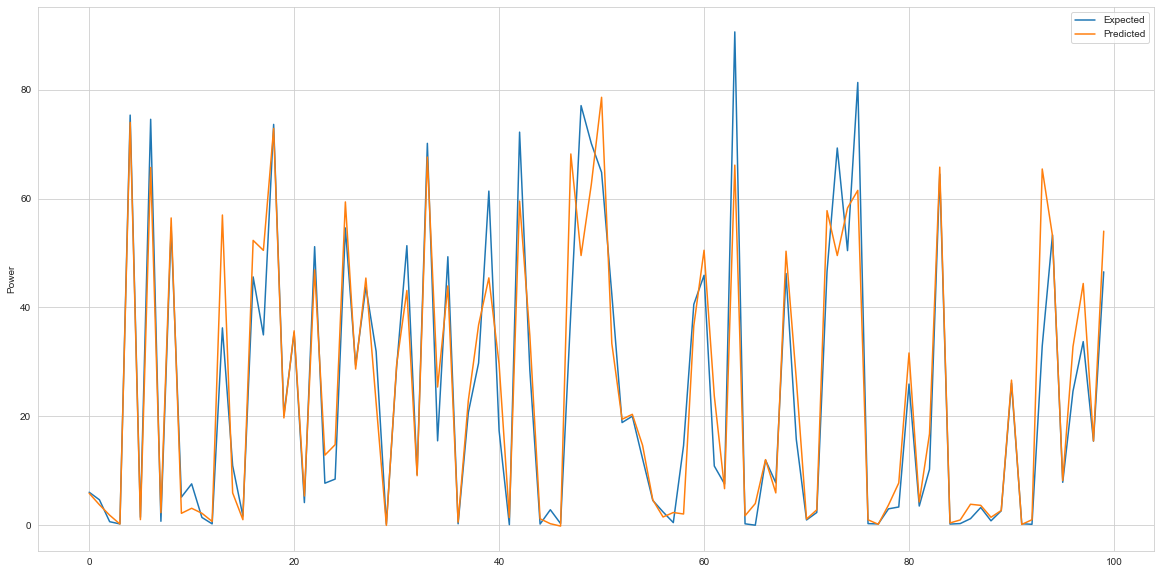

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

pyplot.figure(figsize=(20,10))
pyplot.plot(expectations[0:100], label="Expected")
pyplot.plot(predictions[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("")
pyplot.ylabel("Power")
pyplot.savefig('./WF1 XGBoost.jpg')

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expectations, predictions)


5.287671508125385

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expectations, predictions)


178580913305631.0

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(expectations, predictions)


77.93335005494377

In [15]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
smape(expectations, predictions)

46.92754881068018